# Tutorial of CNN using Keras with Theano backend
## Environment setup
Python3 uses Tensorflow as default backend. 
So we have to export environment variable `KERAS_BACKEND`
to specify the backend we are using.

In [1]:
import os
os.environ['KERAS_BACKEND']='theano'
! echo ${KERAS_BACKEND}

theano


Then we are able to import Theano and keras and see their versions.

In [3]:
import theano
import keras

print (theano.__version__)
print (keras.__version__)

1.0.1
2.1.5


The libraries we are going to use are imported here.

In [4]:
import numpy as np
# models
from keras.models import Sequential
# core layers
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
# utilities
from keras.utils import np_utils, plot_model
# plotting
from matplotlib import pyplot as plt

## Download the MNIST images
The Keras library has it already!

In [5]:
from keras.datasets import mnist
 
# Load pre-shuffled MNIST data into train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [6]:
print (X_train.shape)
# (60000, 28, 28)

(60000, 28, 28)


TypeError: Invalid dimensions for image data

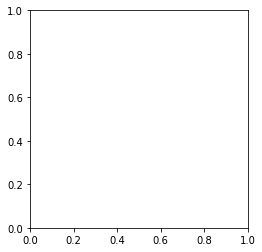

In [63]:
plt.set_cmap('binary')
plt.imshow(X_train[0])

## Prepocessing the data
Images are reshaped to tensor of size 1x28x28 and $[0,1]$ float data.

In [8]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

print (X_train.shape)

(60000, 28, 28, 1)


Labels are transformed from label name to one-hot encoded categorical by using `to_categorical`

In [9]:
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)
print("original label: ", y_test[0])
print("one-hot encoded label: ", Y_test[0])

('original label: ', 7)
('one-hot encoded label: ', array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]))


## Model bulidup
We use Keras `Sequential()` to build our model.
(Document here: https://keras.io/getting-started/sequential-model-guide/)

For feature layers,
we build a model with 2 layers of CNN with ReLU as activation function
by using `Conv2D()` and setting `activation` attribute to `'relu'`.
After that there is a max pooling layer `MaxPooling2D()`
and a dropout layer `Dropout()`.
For classification layers,
we first flatten out the layers by using `Flatten()`,
and use a fully connected layer `Dense()`
with ReLU as activation function.
Then dropout again and another fully connected layer ended with a soft-max classifier.

Finally, use `summary()` function 
to summarize all shapes and parameters of this model architecture.

In [10]:
# first define the model to be sequential
model = Sequential()
# feature layers
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
# classifier layers
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
# print the model architecture
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               589952    
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
__________

Use `compile()` function of the model
to setup the loss function, the optimization algorithm,
and the validation metrics.

In [11]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

Then we use `fit()` to enable the training procedures.
We can assign `history` as the function output
to memorize all the training details for visualization later on.

In [13]:
history = model.fit(X_train, Y_train, 
                    batch_size=32,
                    epochs=10,
                    validation_split=0.2,
                    verbose=1)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 328s 7ms/step - loss: 0.2330 - acc: 0.9287 - val_loss: 0.0581 - val_acc: 0.9824
Epoch 2/10
48000/48000 [==============================] - 345s 7ms/step - loss: 0.0928 - acc: 0.9719 - val_loss: 0.0445 - val_acc: 0.9862
Epoch 3/10
48000/48000 [==============================] - 362s 8ms/step - loss: 0.0701 - acc: 0.9778 - val_loss: 0.0457 - val_acc: 0.9869
Epoch 4/10
48000/48000 [==============================] - 365s 8ms/step - loss: 0.0568 - acc: 0.9828 - val_loss: 0.0416 - val_acc: 0.9880
Epoch 5/10
48000/48000 [==============================] - 324s 7ms/step - loss: 0.0489 - acc: 0.9852 - val_loss: 0.0382 - val_acc: 0.9901
Epoch 6/10
48000/48000 [==============================] - 350s 7ms/step - loss: 0.0442 - acc: 0.9860 - val_loss: 0.0389 - val_acc: 0.9892
Epoch 7/10
48000/48000 [==============================] - 369s 8ms/step - loss: 0.0385 - acc: 0.9879 - val_loss: 0.0373 - 

After training finishes, we can see what is inside `history` that we can look into.

In [14]:
print(history.history.keys())

['acc', 'loss', 'val_acc', 'val_loss']


Visualizing the training history.

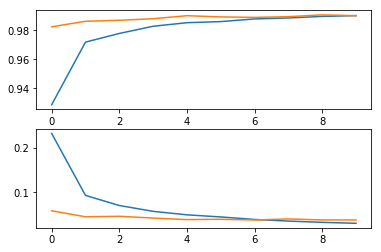

In [15]:
plt.subplot(211)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.subplot(212)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

Evaluate the model on the test data set.

In [18]:
test_loss, test_acc = model.evaluate(X_test, Y_test, verbose=1)
print("Test loss = ", test_loss)
print("Test accuracy = ", test_acc)

10000/10000 [==============================] - 26s 3ms/step
('Test loss = ', 0.03260759085248201)
('Test accuracy = ', 0.991)


<Figure size 432x288 with 0 Axes>

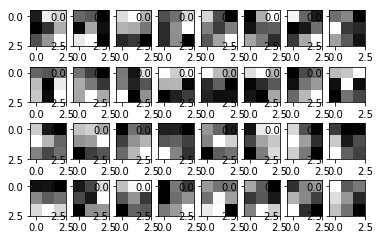

In [65]:
a = model.layers[0].get_weights()
aa = np.reshape(a[0],(3,3,32))
plt.set_cmap('binary')
f, axarr = plt.subplots(4, 8)
for i in range(32):
    a = int(i/8)
    b = i%8
    axarr[a,b].imshow(aa[:,:,i])

#for layer in model.layers:
#    g = layer.get_config()
#    h = layer.get_weights()
#    print (g)  
#    print (h)